## DATA ANALYSIS ON STROKE PREDICTION 

### Feature Information

 - id: unique identifier
 - gender: "Male", "Female" or "Other"
 - age: age of the patient
 - hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
 - heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
 - ever_married: "No" or "Yes"
 - work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
 - Residence_type: "Rural" or "Urban"
 - avg_glucose_level: average glucose level in blood
 - bmi: body mass index
 - smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 - stroke: 1 if the patient had a stroke or 0 if not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from termcolor import colored


import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Loading dataset

In [3]:
df0=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df=df0.copy()

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0


### - A General Looking at the Data

In [6]:
#Check for top 5 datas using .head()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


In [7]:
#Check for last 5 datas using .tail()
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0
5109,44679,Female,44.000,0,0,Yes,Govt_job,Urban,85.280,26.200,Unknown,0


In [8]:
#check for random datas using .sample()
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4279,26025,Female,45.000,0,0,Yes,Govt_job,Urban,103.220,20.500,never smoked,0
2515,54807,Male,62.000,1,1,Yes,Private,Rural,176.250,NaN,never smoked,0
2827,67880,Male,5.000,0,0,No,children,Urban,148.520,20.600,Unknown,0
657,20364,Female,4.000,0,0,No,children,Urban,107.250,12.000,Unknown,0
281,45222,Male,58.000,1,0,No,Private,Urban,55.780,27.500,smokes,0
4695,46514,Female,50.000,0,0,Yes,Govt_job,Urban,100.930,32.700,never smoked,0
5089,56714,Female,0.720,0,0,No,children,Rural,62.130,16.800,Unknown,0
3530,58149,Female,21.000,0,0,No,Private,Rural,85.860,35.400,Unknown,0
3151,50489,Female,56.000,0,0,Yes,Govt_job,Urban,112.620,24.800,never smoked,0
4296,21677,Female,64.000,0,0,Yes,Private,Rural,75.130,31.100,formerly smoked,0


In [9]:
#Columns present in the Dataset .columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
#Check for rows and columns in the dataset using .shape()
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 5110 observation and 12 columns in the dataset


In [11]:
#Check for their Count and Datatype using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Statistical analysis

In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000,5110.000,5110.000,5110.000,5110.000,4909.000,5110.000
mean,36517.829,43.227,0.097,0.054,106.148,28.893,0.049
std,21161.722,22.613,0.297,0.226,45.284,7.854,0.215
min,67.000,0.080,0.000,0.000,55.120,10.300,0.000
25%,17741.250,25.000,0.000,0.000,77.245,23.500,0.000
50%,36932.000,45.000,0.000,0.000,91.885,28.100,0.000
75%,54682.000,61.000,0.000,0.000,114.090,33.100,0.000
max,72940.000,82.000,1.000,1.000,271.740,97.600,1.000


### Drop ID Columns

In [13]:
df=df.drop(['id'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Checking the missing values

In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### We have,
 - Categorical features: 7 (gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status) 
 - Numerical features: 3 (age, avg_glucose_level, bmi)

In [16]:
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
num_cols = ['age','avg_glucose_level','bmi']

Only one feature have missing values(0.009%), we will have to someways to fill it. 

## Now EDA

### 1.Univariate Analysis

Analysing realationship of all features w.r.t target

<AxesSubplot:xlabel='gender', ylabel='count'>

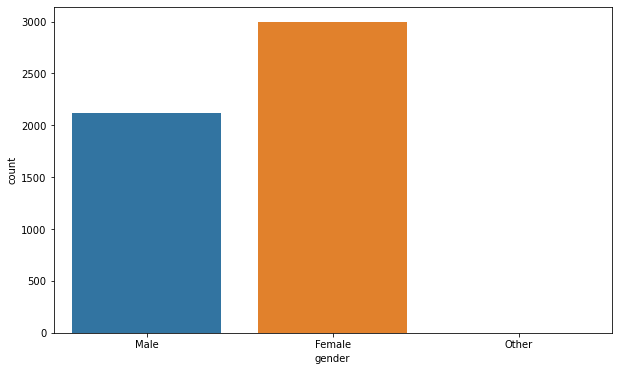

In [17]:
sns.countplot(x="gender",data=df)

We have to keep in mind that in this data, females are more compared to male.

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

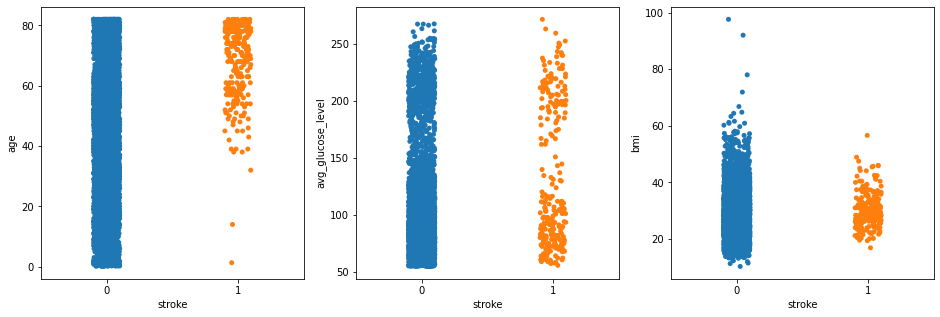

In [18]:
num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df, x='stroke',y='age')
plt.subplot(1, 3,2)
sns.stripplot(data=df, x='stroke',y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.stripplot(data=df, x='stroke',y='bmi')

### Conclusions

Almost all patients who have got stroke are above 50 years of age.But some are below 40, exceptionally 2 patients are below 20. Patients who got stroke were either with low glucose level or high glucose level but low glucose level patients have more probability of getting stroke. Mostly stroke patients have 'bmi' in range of 20-40.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

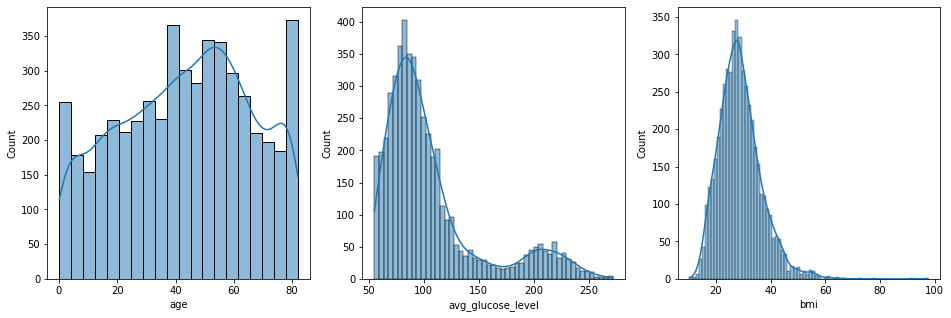

In [19]:
#distribution of numerical columns

num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.histplot(data=df,x='age',kde=True)
plt.subplot(1, 3,2)
sns.histplot(data=df,x='avg_glucose_level',kde=True)
plt.subplot(1, 3,3)
sns.histplot(data=df,x='bmi',kde=True)

<AxesSubplot:xlabel='bmi'>

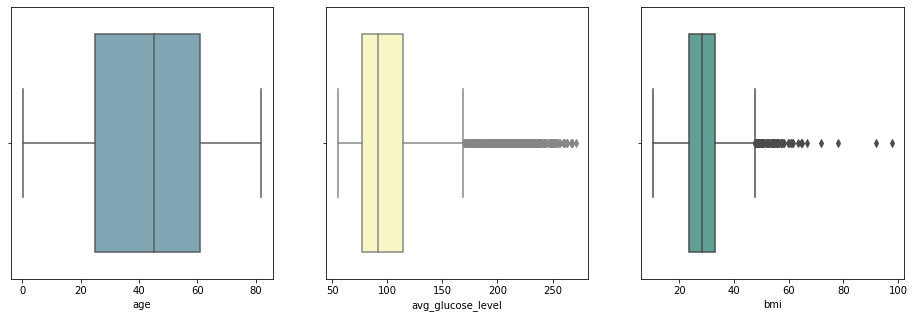

In [20]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.boxplot(x=df['age'],palette="blend:#7AB,#EDA")
plt.subplot(1, 3,2)
sns.boxplot(x=df['avg_glucose_level'],palette="Spectral")
plt.subplot(1, 3,3)
sns.boxplot(x=df['bmi'],palette="dark:#5A9_r")

### Conclusions:

 - bmi have some outliers

### Removing Undefined data in an column

In the "gender" column there has been an undefined classification which makes no contribution to understand stroke. So let's discard this row from the analysis

In [21]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [22]:
df["gender"].replace({"Other": "Male"}, inplace=True)

In [23]:
df.gender.value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

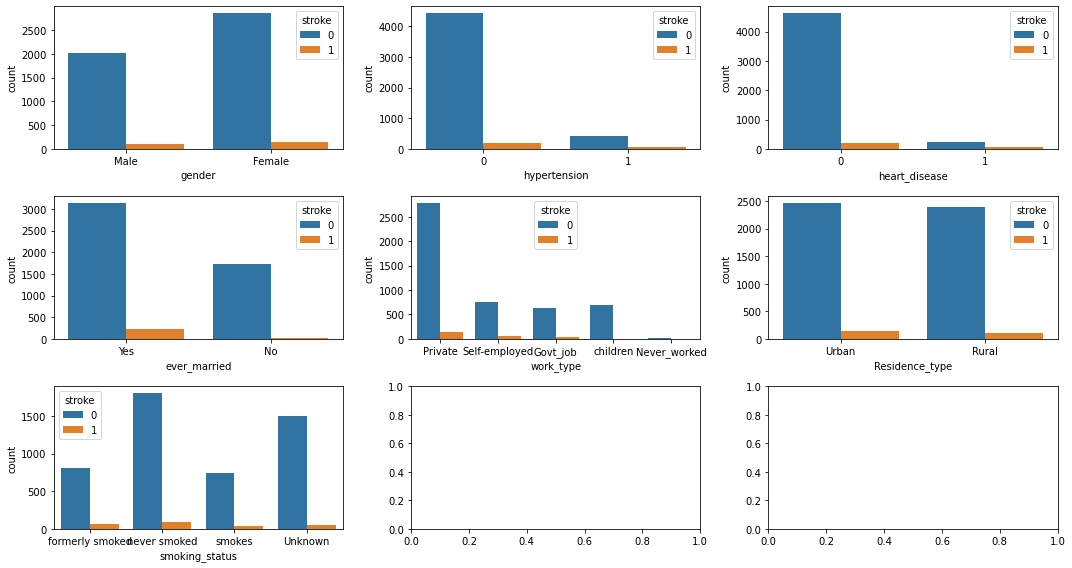

In [24]:
# plots between categoical features and target
ncols =3
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

fig,ax = plt.subplots(3, 3,figsize=(15, 8))

for idx, feature in enumerate(cat_cols):
    row = idx//ncols
    col = idx% ncols
    sns.countplot(data=df, x=feature, hue='stroke',ax =ax[row,col])
    
plt.tight_layout() 

### Conclusions

 - Interestingly,the ratio of getting stroke is same whether patient is from rural and urban.
 - Patients who ever-married,are getting more strokes than non-married.
 - Ratio of getting stroke or not is same for Private and self-employed people.
 - If patient is non-smoker, he or she have less chance of getting stroke and their ratio from barely smoker is almost same.
 
 For getting the correlation between all features and target, we have to fill Nan values and encode all categorical columns. Let's do it.

### Imputing missing BMI values with its median value

In [25]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['bmi'] = imp.fit_transform(df[["bmi"]]) 

### Converting  categorical variables with numerically coded values

In [26]:
#Encoding 
from sklearn.preprocessing import OrdinalEncoder

enc_col =["gender", "work_type",'ever_married',"Residence_type","smoking_status"]
enc = OrdinalEncoder()
df[enc_col] = enc.fit_transform(df[enc_col])

In [27]:
df.head(25)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.000,67.000,0,1,1.000,2.000,1.000,228.690,36.600,1.000,1
1,0.000,61.000,0,0,1.000,3.000,0.000,202.210,28.100,2.000,1
2,1.000,80.000,0,1,1.000,2.000,0.000,105.920,32.500,2.000,1
3,0.000,49.000,0,0,1.000,2.000,1.000,171.230,34.400,3.000,1
4,0.000,79.000,1,0,1.000,3.000,0.000,174.120,24.000,2.000,1
5,1.000,81.000,0,0,1.000,2.000,1.000,186.210,29.000,1.000,1
6,1.000,74.000,1,1,1.000,2.000,0.000,70.090,27.400,2.000,1
7,0.000,69.000,0,0,0.000,2.000,1.000,94.390,22.800,2.000,1
8,0.000,59.000,0,0,1.000,2.000,0.000,76.150,28.100,0.000,1
9,0.000,78.000,0,0,1.000,2.000,1.000,58.570,24.200,0.000,1


## ⮚	ANALYSING EACH ATTRIBUTE

## Gender

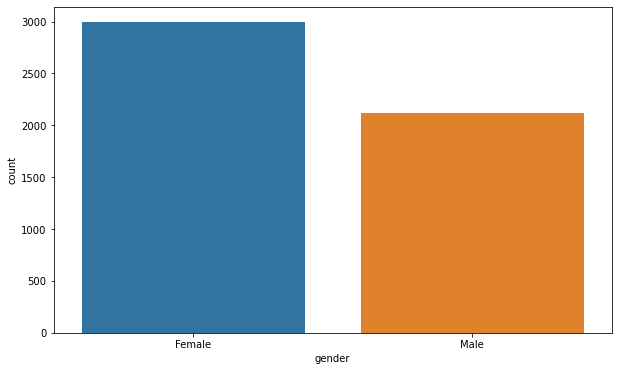

In [28]:
sns.countplot(x="gender",data=df)
plt.gca().set_xticklabels(['Female', 'Male'])
plt.show()

### From the above graph:-
 - 	Majority of candidates are female in the above dataset.

## Age

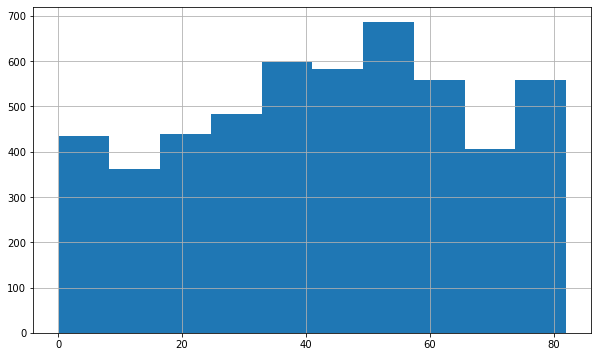

In [29]:
df.age.hist()
plt.show()

 - The visualization above displays how the ages are distributed among the entries in our dataset.
 - The ages range from 0 to 82 years old.
 - It has the majority of entries between the ages of 32 and 66 years.

## Hypertension

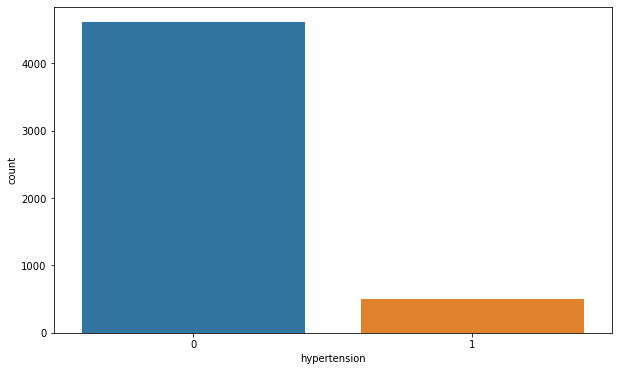

In [30]:
sns.countplot(x="hypertension",data=df)
plt.show()

### From the above graph:-
 - 	Majority of candidates are not suffering from hypertension
 -  A large proportion (90.3%) of the population is not afflicted by hypertension, while a small proportion (9.7%) is experiencing hypertension.

## Heart Disease

Text(0, 0.5, '')

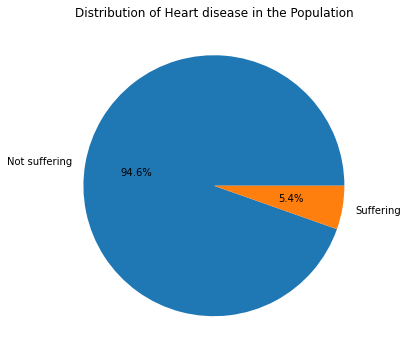

In [31]:
df['heart_disease'].value_counts().plot(kind='pie', labels=['Not suffering', 'Suffering'], autopct='%1.1f%%')
plt.title('Distribution of Heart disease in the Population')
plt.ylabel('')

### From the above graph:-
 - 	The majority of candidates are free from Heart Disease.
 -  Out of the total population, a mere 5.4% are suffering from heart disease, leaving a significant 94.6% without any affliction.

## Ever Married

Text(0, 0.5, '')

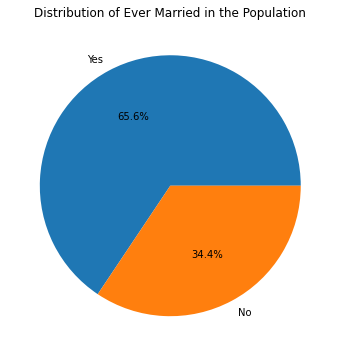

In [32]:
df['ever_married'].value_counts().plot(kind='pie', labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Distribution of Ever Married in the Population')
plt.ylabel('')

### From the above graph:-
 - 	The pie chart indicates that a majority of the population (65.6%) have been married.
 -  while a minority (34.4%) have never been married.

## Work Type

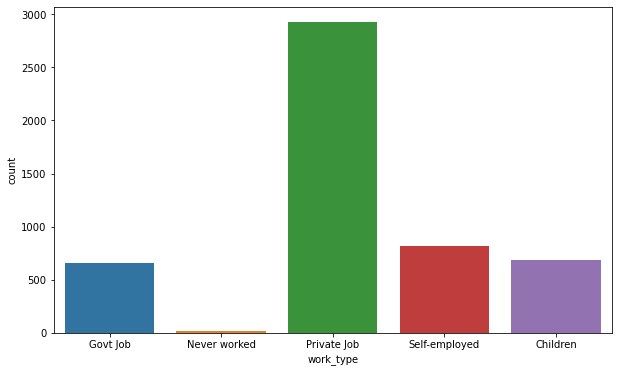

In [33]:
sns.countplot(x="work_type",data=df)
plt.gca().set_xticklabels(['Govt Job', 'Never worked', 'Private Job', 'Self-employed', 'Children'])
plt.show()

### From the above graph:-
 - The largest group of individuals in the dataset work in the private sector, with a count of 2925.
 - Self-employed individuals are the next most common group, with a count of 819.
 - The smallest groups in the dataset are those who have never worked (22), government job employees (657), and children (687).

## Residence Type

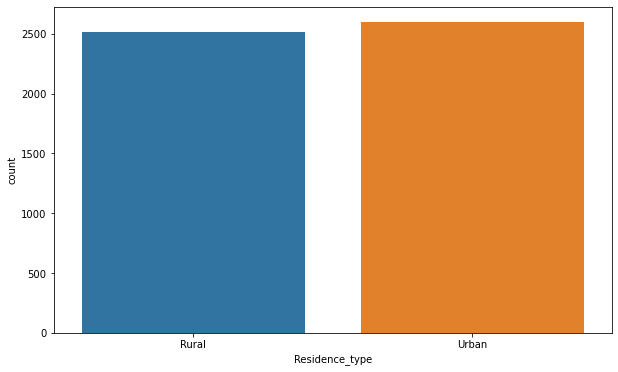

In [34]:
sns.countplot(x="Residence_type",data=df)
plt.gca().set_xticklabels(['Rural', 'Urban'])
plt.show()

### From the above graph:-
 - The data shows that the number of individuals living in urban areas is almost equal to those living in rural areas, with urban residents accounting for 50.8% of the population and rural residents accounting for 49.2%.
 - The "Urban" and "Rural" categories are almost evenly distributed, with no significant difference in the number of individuals living in each type of area.

## Average glucose level

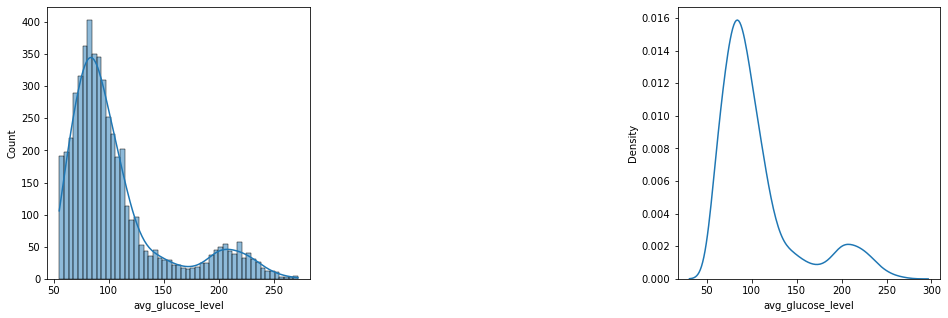

In [35]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.histplot(data=df,x='avg_glucose_level',kde=True)

plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='avg_glucose_level');

### From the above graph:-
- The distribution of the average glucose level data is positively skewed, with a skewness of 1.5722839, and a kurtosis of 1.6804785, indicating that the data is relatively more spread out than a normal distribution.

## Body mass index

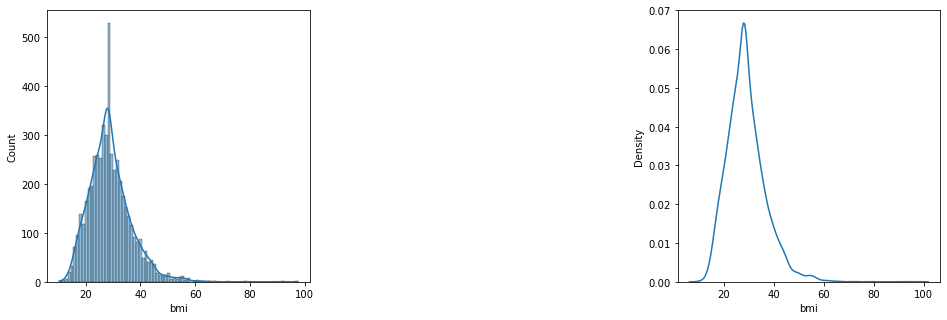

In [36]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.histplot(data=df,x='bmi',kde=True)

plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='bmi');

### From the above graph:-
 - The majority of people in the dataset are overweight or obese.
 - The distribution of BMI values is slightly skewed to the right.
 - There are some people with lower BMI values in the dataset, but the majority of people have higher BMI values.

## Smoking Status

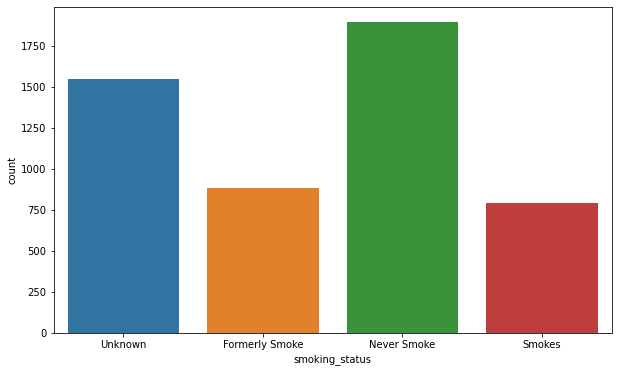

In [37]:
sns.countplot(x="smoking_status",data=df)
plt.gca().set_xticklabels(['Unknown', 'Formerly Smoke', 'Never Smoke', 'Smokes'])
plt.show()

### From the above graph:-
 - The majority of people in the dataset have never smoked.
 - A significant number of people in the dataset have smoked in the past, but have since quit.
 - A small number of people in the dataset currently smoke.

### 2.Bivariate Analysis

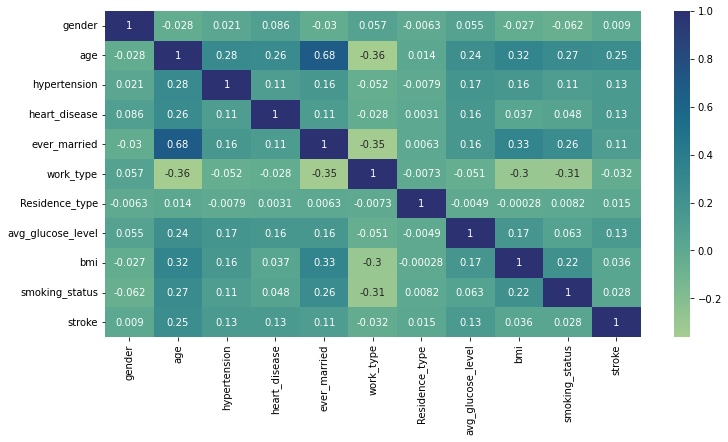

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df.corr(),annot=True,
            cmap="crest",fmt=".2g");

Wow, We got some good information here:

 - Age and Worktype have strong negatinve correlation.
 - Worktype and bmi have fairly good negative correlation.
 
Let's draw them seperately and see what we get,

In [39]:
#num_cols = ['age','avg_glucose_level','bmi']
#sns.scatterplot(data=df, x='age',y='bmi');

In [40]:
#sns.scatterplot(data=df, x='age',y='avg_glucose_level');

In [41]:
#sns.scatterplot(data=df, x='avg_glucose_level',y='bmi');

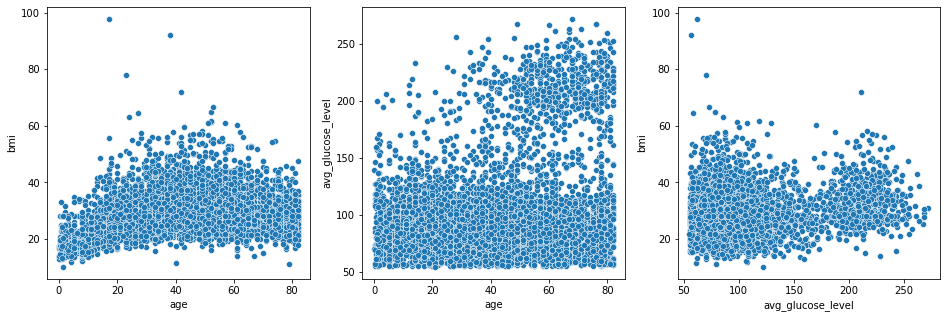

In [42]:
num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.scatterplot(data=df, x='age',y='bmi')
plt.subplot(1, 3,2)
sns.scatterplot(data=df, x='age',y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.scatterplot(data=df, x='avg_glucose_level',y='bmi');

### Conclusions:

 - Accodring to data, high avg_glucose_level is recorded in patient of age above 50.
 - BMI is high in patients of age between 20-60.
 - If glucose level is low then it is more chance that your bmi level is high according to this data.

## Age Vs. Heart_disease, Work_type, Hypertension

In [43]:
#sns.stripplot(data=df,x='heart_disease',y='age');

In [44]:
#sns.stripplot(data=df,x='hypertension',y='age');

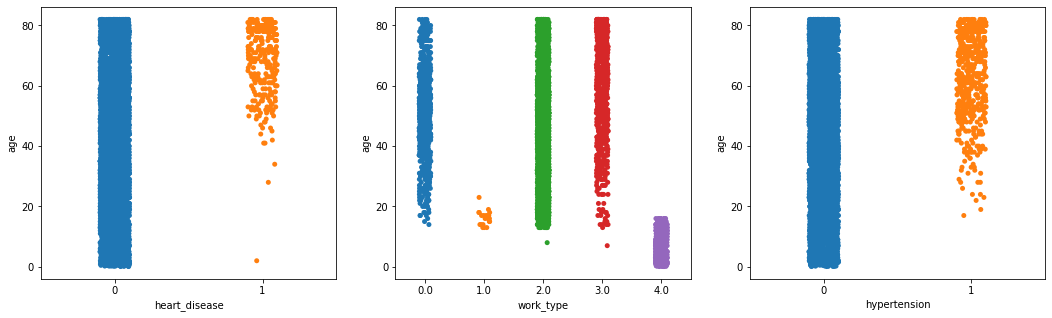

In [45]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df,x='heart_disease',y='age')
plt.subplot(1, 3,2)
sns.stripplot(data=df,x='work_type',y='age')
plt.subplot(1, 3,3)
sns.stripplot(data=df,x='hypertension',y='age');

### Conclusions:    

 - Almost all heart disease people are above 50, which is obvious.
 - Hypertension disease in people of above 50.

In [46]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.000,67.000,0,1,1.000,2.000,1.000,228.690,36.600,1.000,1
1,0.000,61.000,0,0,1.000,3.000,0.000,202.210,28.100,2.000,1
2,1.000,80.000,0,1,1.000,2.000,0.000,105.920,32.500,2.000,1
3,0.000,49.000,0,0,1.000,2.000,1.000,171.230,34.400,3.000,1
4,0.000,79.000,1,0,1.000,3.000,0.000,174.120,24.000,2.000,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 439.3 KB


In [48]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000,5110.000
mean,0.414,43.227,0.097,0.054,0.656,2.168,0.508,106.148,28.862,1.377,0.049
std,0.493,22.613,0.297,0.226,0.475,1.090,0.500,45.284,7.700,1.072,0.215
min,0.000,0.080,0.000,0.000,0.000,0.000,0.000,55.120,10.300,0.000,0.000
25%,0.000,25.000,0.000,0.000,0.000,2.000,0.000,77.245,23.800,0.000,0.000
50%,0.000,45.000,0.000,0.000,1.000,2.000,1.000,91.885,28.100,2.000,0.000
75%,1.000,61.000,0.000,0.000,1.000,3.000,1.000,114.090,32.800,2.000,0.000
max,1.000,82.000,1.000,1.000,1.000,4.000,1.000,271.740,97.600,3.000,1.000


In [49]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [50]:
#df.to_csv('my_data.csv', index=False)

### Now Divid X and Y Column

In [51]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

### Splitting the dataset

In [52]:
# splitting the data into train and valid dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3832, 10)
Shape of x_test : (1278, 10)
Shape of y_train : (3832,)
Shape of y_test : (1278,)


### Scale the data

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scale=MinMaxScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
X_train_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.000,0.756,0.000,0.000,1.000,0.500,1.000,0.319,0.265,0.667
1,0.000,0.060,0.000,0.000,0.000,1.000,1.000,0.096,0.111,0.000
2,0.000,0.353,0.000,0.000,0.000,0.500,1.000,0.078,0.271,0.333
3,1.000,0.658,0.000,0.000,1.000,0.500,0.000,0.699,0.288,1.000
4,0.000,0.585,0.000,0.000,1.000,0.500,1.000,0.143,0.297,0.667
...,...,...,...,...,...,...,...,...,...,...
3827,0.000,0.658,0.000,0.000,1.000,0.500,0.000,0.260,0.238,0.667
3828,0.000,0.670,0.000,0.000,1.000,0.500,0.000,0.265,0.258,1.000
3829,0.000,0.487,0.000,0.000,1.000,0.500,0.000,0.629,0.202,1.000
3830,1.000,0.022,0.000,0.000,0.000,1.000,1.000,0.121,0.037,0.000


In [55]:
X_test_scaled = pd.DataFrame(scale.fit_transform(x_test),columns=x_test.columns)
X_test_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.000,0.352,0.000,0.000,1.000,0.500,1.000,0.290,0.150,0.667
1,1.000,0.706,0.000,0.000,1.000,0.000,1.000,0.220,0.287,0.667
2,0.000,0.450,0.000,0.000,1.000,0.500,0.000,0.507,0.348,0.667
3,0.000,0.596,0.000,0.000,1.000,0.000,1.000,0.166,0.147,0.000
4,0.000,0.694,0.000,0.000,1.000,0.500,1.000,0.109,0.264,0.667
...,...,...,...,...,...,...,...,...,...,...
1273,0.000,0.450,0.000,0.000,1.000,0.000,1.000,0.047,0.268,0.667
1274,0.000,0.682,0.000,0.000,1.000,0.500,0.000,0.808,0.145,1.000
1275,0.000,0.291,0.000,0.000,1.000,0.750,0.000,0.068,0.227,0.667
1276,1.000,0.303,0.000,0.000,1.000,0.750,1.000,0.132,0.250,0.000


## Now Model Building Part

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred=log_reg.predict(X_test_scaled)

### Now Make The Confusion Metrix for Logistic Regression

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm=confusion_matrix(y_test,y_pred)

In [65]:
print(cm)

[[1218    0]
 [  60    0]]


### Now Checking the training and testing Accuracy for  Logistic Regression

In [66]:
print('Training-set accuracy score:', log_reg.score(X_train_scaled, y_train))

Training-set accuracy score: 0.9506784968684759


In [67]:
print('Test-set accuracy score:', log_reg.score(X_test_scaled, y_test))

Test-set accuracy score: 0.9530516431924883


In [68]:
from sklearn import metrics

In [69]:
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
acc_log_clf

0.9530516431924883

### Model Accuracy for  Logistic Regression

[LogisticRegression()]
Score :  0.9530516431924883


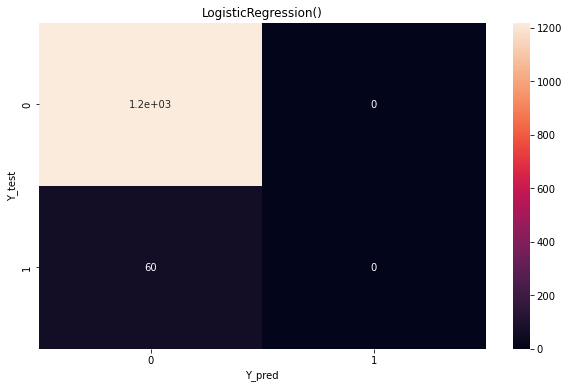

In [76]:
pred_list = [log_reg]
#print(pred_list)

#import pickle

#PICKLE_FILE_PATH = 'pred_list.pkl'

"""" with open(PICKLE_FILE_PATH, "wb") as f:
    pickle.dump(pred_list, f) """

for i in pred_list:
    print("Score : ",i.score(X_test_scaled,y_test))
    y_pred = i.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

###  Decision Tree

In [355]:
from sklearn import tree

In [392]:
model=tree.DecisionTreeClassifier()
model.fit(X_train_scaled,y_train);

In [357]:
y_pred=model.predict(X_test_scaled)

### Now Make The Confusion Metrix for Decision Tree

In [358]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1164   54]
 [  50   10]]


### Now Checking the training and testing Accuracy Decision Tree

In [359]:
print('Training-set accuracy score:', log_reg.score(X_train_scaled, y_train))

Training-set accuracy score: 0.9506784968684759


In [360]:
print('Test-set accuracy score:', log_reg.score(X_test_scaled, y_test))

Test-set accuracy score: 0.9530516431924883


In [361]:
from sklearn import metrics

In [362]:
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
acc_log_clf

0.918622848200313

### Model Accuracy for Decision Tree

Score :  0.918622848200313


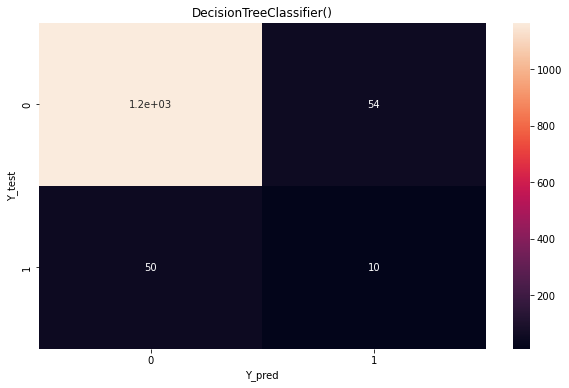

In [363]:
pred_list = [model]

for i in pred_list:
    print("Score : ",i.score(X_test_scaled,y_test))
    y_pred = i.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

### Random Forest

In [364]:
from sklearn.ensemble import RandomForestClassifier

In [365]:
regressor = RandomForestClassifier(n_estimators=1000, max_features=9)
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)

### Now Make The Confusion Metrix for Random Forest

In [366]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1212    6]
 [  58    2]]


### Now Checking the training and testing Accuracy for  Random Forest

In [367]:
print('Training-set accuracy score:', log_reg.score(X_train_scaled, y_train))

Training-set accuracy score: 0.9506784968684759


In [368]:
print('Test-set accuracy score:', log_reg.score(X_test_scaled, y_test))

Test-set accuracy score: 0.9530516431924883


In [369]:
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
acc_log_clf

0.9499217527386542

### Model Accuracy for Random Forest

Score :  0.9499217527386542


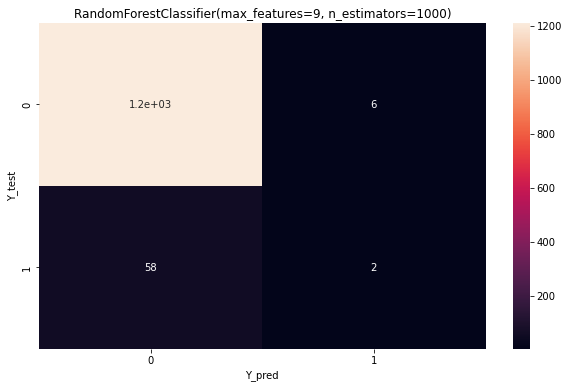

In [370]:
pred_list = [regressor]

for i in pred_list:
    print("Score : ",i.score(X_test_scaled,y_test))
    y_pred = i.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

### KNN Classifier

In [371]:
from sklearn.neighbors import KNeighborsClassifier

In [372]:
knc = KNeighborsClassifier(n_neighbors=10)
knc=knc.fit(X_train_scaled,y_train)
y_pred=knc.predict(X_test_scaled)

### Now Make The Confusion Metrix for KNN Classifier

In [373]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1218    0]
 [  60    0]]


### Now Checking the training and testing Accuracy for  KNN Classifier

In [374]:
print('Training-set accuracy score:', log_reg.score(X_train_scaled, y_train))

Training-set accuracy score: 0.9506784968684759


In [375]:
print('Test-set accuracy score:', log_reg.score(X_test_scaled, y_test))

Test-set accuracy score: 0.9530516431924883


In [376]:
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
acc_log_clf

0.9530516431924883

### Model Accuracy for KNN Classifier

Score :  0.9530516431924883


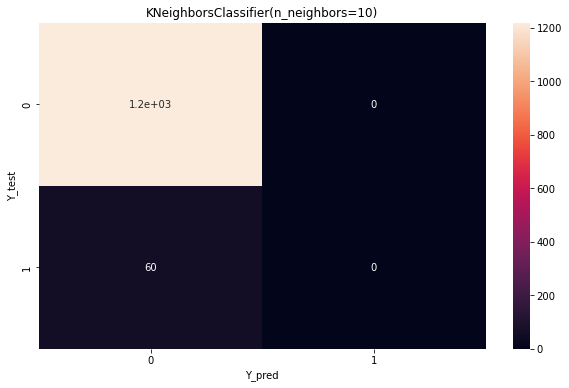

In [377]:
pred_list = [knc]

for i in pred_list:
    print("Score : ",i.score(X_test_scaled,y_test))
    y_pred = i.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

### SUPPORT VECTOR MACHINE 

In [378]:
from sklearn.svm import SVC

In [379]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

### Now Make The Confusion Metrix for Support Vector Machine

In [380]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1218    0]
 [  60    0]]


### Now Checking the training and testing Accuracy for Support Vector Machine

In [381]:
print('Training-set accuracy score:', log_reg.score(X_train_scaled, y_train))

Training-set accuracy score: 0.9506784968684759


In [382]:
print('Test-set accuracy score:', log_reg.score(X_test_scaled, y_test))

Test-set accuracy score: 0.9530516431924883


In [383]:
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
acc_log_clf

0.9530516431924883

### Model Accuracy for Support Vector Machine

Score :  0.9530516431924883


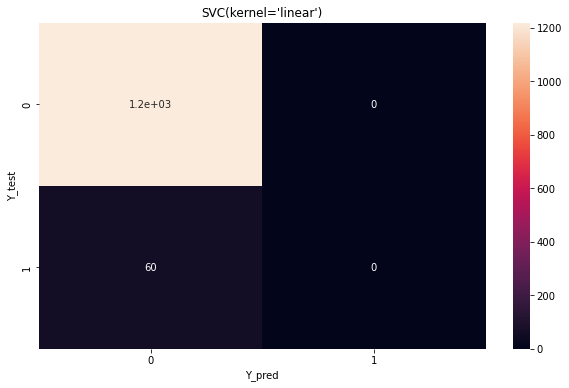

In [384]:
pred_list = [svm_model]

for i in pred_list:
    print("Score : ",i.score(X_test_scaled,y_test))
    y_pred = i.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

### NAIVE BAYES

In [385]:
from sklearn.naive_bayes import GaussianNB

In [386]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

### Now Make The Confusion Metrix for Naive bayes

In [387]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1067  151]
 [  33   27]]


### Now Checking the training and testing Accuracy for Support Vector Machine

In [388]:
print('Training-set accuracy score:', log_reg.score(X_train_scaled, y_train))

Training-set accuracy score: 0.9506784968684759


In [389]:
print('Test-set accuracy score:', log_reg.score(X_test_scaled, y_test))

Test-set accuracy score: 0.9530516431924883


In [390]:
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
acc_log_clf

0.8560250391236307

### Model Accuracy for Naive Bayes

Score :  0.8560250391236307


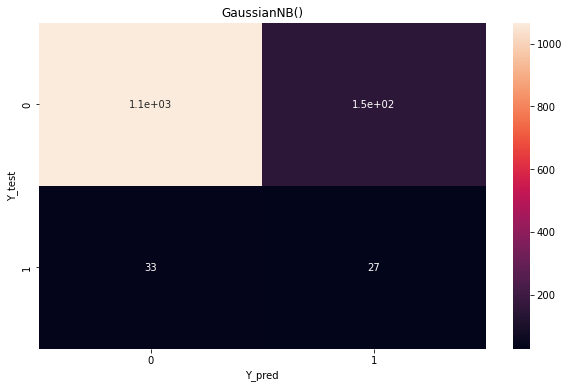

In [391]:
pred_list = [nb_model]

for i in pred_list:
    print("Score : ",i.score(X_test_scaled,y_test))
    y_pred = i.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()